<a href="https://colab.research.google.com/github/yuki-tamaribuchi/ml_samples/blob/master/mnist_fully_connected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense

In [2]:
tf.random.set_seed(0)

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [4]:
x_train,x_test,=x_train/255.0,x_test/255.0
y_train,y_test=np.asarray(y_train).astype('float32').reshape((-1,1)),np.asarray(y_test).astype('float32').reshape((-1,1))
print(x_train.shape)

(60000, 28, 28)


In [5]:
y_train

array([[5.],
       [0.],
       [4.],
       ...,
       [5.],
       [6.],
       [8.]], dtype=float32)

In [6]:
y_train=tf.one_hot(y_train,10)
y_train=y_train.numpy()
y_train=y_train.reshape(-1,10)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [8]:
y_train.shape

(60000, 10)

In [9]:
#input_shape=x_train.reshape(-1,28,28,1).shape
input_shape=x_train.shape

print(input_shape)

(60000, 28, 28)


In [10]:
model=Sequential(name='model_mnist')
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.build(input_shape=input_shape)

In [11]:
model.summary()

Model: "model_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (60000, 784)              0         
_________________________________________________________________
dense (Dense)                (60000, 128)              100480    
_________________________________________________________________
dense_1 (Dense)              (60000, 10)               1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


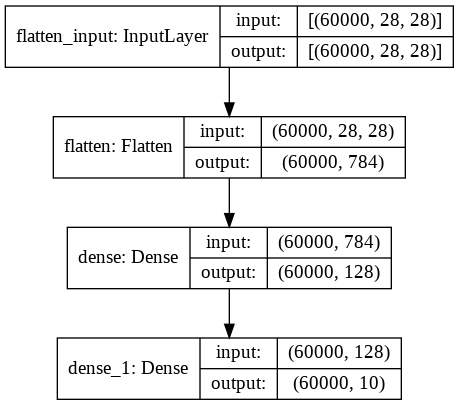

In [12]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
    )

In [14]:
model.fit(x=x_train,y=y_train,batch_size=128,epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.6210 - accuracy: 0.8321
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1696 - accuracy: 0.9513
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1226 - accuracy: 0.9661
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0936 - accuracy: 0.9736
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0685 - accuracy: 0.9804


In [15]:
y_test=tf.one_hot(y_test,10)
y_test=y_test.numpy()
y_test=y_test.reshape(-1,10)

In [16]:
model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9753


[0.08375224471092224, 0.9753000140190125]

In [17]:
model.save('mnist_model')

INFO:tensorflow:Assets written to: mnist_model/assets
